## Project Overview
    - Title: cars_data
    - Brief Desciption: 
    - goal of this project: 


## Imports

In [1]:
# Standard libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Configurations
pd.set_option('display.max_columns', None)  # Show all columns
sns.set_style('darkgrid')  # Set visualization style


## Load & Inspect Data

In [2]:
# Load dataset
df_vehicles = pd.read_csv('vehicles_us.csv',low_memory= False)

In [3]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df_vehicles.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [5]:
df_vehicles.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [6]:
df_vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [7]:
# df_vehicles['model_year'].max()
# df_vehicles['model_year'].min()

### Conclusion: The dataset has missing values and mixed data types that need cleaning.

## Data Cleaning & Transformation

In [8]:
# Handling 'model_year'
df_vehicles['model_year'] = df_vehicles['model_year'].fillna(df_vehicles.groupby(['model'])['model_year'].transform('median'))  

# missing odometer values
#df_vehicles['odometer'] = df_vehicles['odometer'].fillna(df_vehicles.groupby('model')['odometer'].transform('median'))

# missing cylinder values
#df_vehicles['cylinders'] = df_vehicles['cylinders'].fillna(df_vehicles.groupby('model')['cylinders'].transform('median'))

In [9]:
df_vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [10]:
# Convert data types
df_vehicles['model_year'] = df_vehicles['model_year'].astype('int64')
df_vehicles['odometer'] = df_vehicles['odometer'].astype('Int64')
df_vehicles['cylinders'] = df_vehicles['cylinders'].astype('Int64')

df_vehicles['date_posted'] = pd.to_datetime(df_vehicles['date_posted']) 

df_vehicles.rename(columns={
    'odometer': 'odometer_miles',
    'date_posted': 'listing_date'
}, inplace=True)

# Split 'model' column into 'make' and 'model'
df_vehicles[['make', 'model']] = df_vehicles['model'].str.split(' ', n=1, expand=True)


## Restoring Missing Data

In [12]:
# Restoring Missing Data

# Handling 'is_4WD', and 'high_mileage'
df_vehicles['is_4wd'] = df_vehicles['is_4wd'].fillna(0).astype(bool)

# Handling paint_color
df_vehicles['paint_color'] = df_vehicles['paint_color'].fillna('Unknown')


In [13]:
df_vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer_miles,transmission,type,paint_color,is_4wd,listing_date,days_listed,make
0,9400,2011,x5,good,6,gas,145000,automatic,SUV,Unknown,True,2018-06-23,19,bmw
1,25500,2011,f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,ford
2,5500,2013,sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,hyundai
3,1500,2003,f-150,fair,8,gas,<NA>,automatic,pickup,Unknown,False,2019-03-22,9,ford
4,14900,2017,200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,chrysler


### Conclusion:
    - is_4WD: missing values assumed to be non-4WD vehicles and filled with 0 (converted to boolean).
    - paint_color: missing values replaced with 'Unknown'.
    - model: split to two

In [14]:
df_vehicles.duplicated().sum()

np.int64(0)

In [15]:
df_vehicles.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer_miles,transmission,type,paint_color,is_4wd,listing_date,days_listed,make
0,9400,2011,x5,good,6,gas,145000,automatic,SUV,Unknown,True,2018-06-23,19,bmw
1,25500,2011,f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,ford
2,5500,2013,sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,hyundai
3,1500,2003,f-150,fair,8,gas,<NA>,automatic,pickup,Unknown,False,2019-03-22,9,ford
4,14900,2017,200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,chrysler


In [18]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  object        
 4   cylinders       46265 non-null  Int64         
 5   fuel            51525 non-null  object        
 6   odometer_miles  43633 non-null  Int64         
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  listing_date    51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  make            51525 non-null  object        
dtypes: Int64(2), bool(1), datetime64[ns](1), int64(3), obj

## Exploratory Data Analysis

In [19]:
df_vehicles.describe()

,price,model_year,cylinders,odometer_miles,listing_date,days_listed
count,51525.000000,51525.000000,46265.0,43633.0,51525,51525.00000
mean,12132.464920,2009.793557,6.125235,115553.461738,2018-10-25 01:57:46.270742528,39.55476
min,1.000000,1908.000000,3.0,0.0,2018-05-01 00:00:00,0.00000
25%,5000.000000,2007.000000,4.0,70000.0,2018-07-29 00:00:00,19.00000
50%,9000.000000,2011.000000,6.0,113000.0,2018-10-25 00:00:00,33.00000
75%,16839.000000,2014.000000,8.0,155000.0,2019-01-21 00:00:00,53.00000
max,375000.000000,2019.000000,12.0,990000.0,2019-04-19 00:00:00,271.00000
std,10040.803015,6.099381,1.66036,65094.611341,NaN,28.20427


In [20]:
df_vehicles['fuel'].value_counts()

fuel
gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: count, dtype: int64

In [21]:
df_vehicles['condition'].value_counts()

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64

In [22]:
df_vehicles['transmission'].value_counts()

transmission
automatic    46902
manual        2829
other         1794
Name: count, dtype: int64

### Conclusion: Most cars use gasoline, conditions vary significantly, with 'excellent' ahead, and automatic transmission is the most common.

## Correlation Analysis

In [23]:
# correlation analysis
numeric_df_vehicles = df_vehicles.select_dtypes(include=['number'])  
numeric_df_vehicles 

,price,model_year,cylinders,odometer_miles,days_listed
0,9400,2011,6,145000,19
1,25500,2011,6,88705,50
2,5500,2013,4,110000,79
3,1500,2003,8,<NA>,9
4,14900,2017,4,80903,28
...,...,...,...,...,...
51520,9249,2013,6,88136,37
51521,2700,2002,4,181500,22
51522,3950,2009,4,128000,32
51523,7455,2013,4,139573,71


In [24]:
# Compute correlation matrix
corr_matrix_vehicles = numeric_df_vehicles.corr()
corr_matrix_vehicles

,price,model_year,cylinders,odometer_miles,days_listed
price,1.000000,0.412969,0.296627,-0.420299,-0.000682
model_year,0.412969,1.000000,-0.149565,-0.460960,-0.005321
cylinders,0.296627,-0.149565,1.000000,0.090160,0.005517
odometer_miles,-0.420299,-0.460960,0.090160,1.000000,0.003804
days_listed,-0.000682,-0.005321,0.005517,0.003804,1.000000


#### price and model_year (0.43) → Newer cars tend to be more expensive.

    price and cylinders (0.30) → More cylinders may mean a more powerful (and pricier) vehicle.
    price and odometer_miles (-0.42) → Higher mileage cars are generally cheaper.


### Conclusion: Price is positively correlated with model year and cylinders but negatively correlated with mileage.

## Visualizations

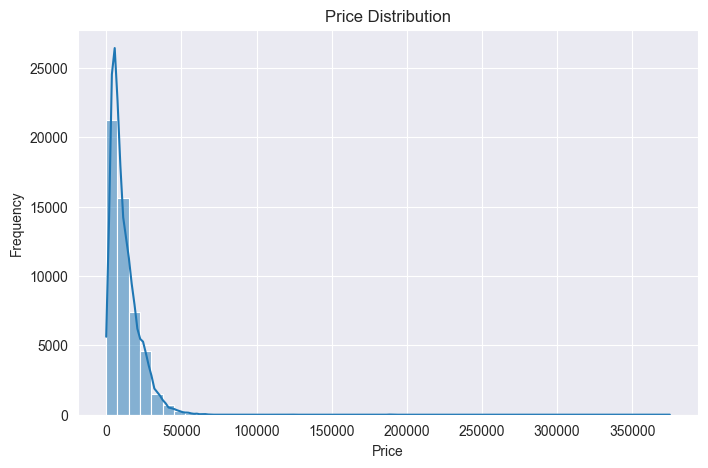

In [25]:
# Visualization Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_vehicles['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

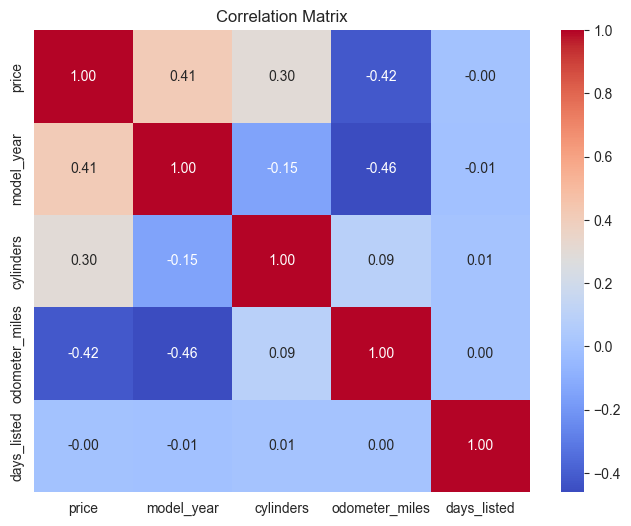

In [26]:
# Visualization heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_vehicles, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Conclusion: Prices are right-skewed, and correlations confirm expected relationships.

## Feature Engineering

In [27]:
# New Columns 
df_vehicles['car_age'] = df_vehicles['model_year'].max() - df_vehicles['model_year']
df_vehicles['price_per_mile'] = df_vehicles['price'] / df_vehicles['odometer_miles']
df_vehicles['price_per_mile'].replace([np.inf, -np.inf], np.nan)
df_vehicles['high_mileage'] = df_vehicles['odometer_miles'].apply(lambda x: 1 if x > 150000 else 0)
df_vehicles.head()

df_vehicles['high_mileage'] = df_vehicles['high_mileage'].map({1: 'Yes', 0: 'No'})

### Conclusion: New features (car age, price per mile, and high mileage flag) provide additional insights into the dataset.

In [28]:
all_cars_models = pd.read_csv('all_cars_model.csv',low_memory= False, delimiter=';')

##### Unused Dataset
    - additional dataset was loaded in the notebook but is not used in my_app.py.
    - does not impact the final analysis or application functionality.

In [29]:
all_cars_models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47523 entries, 0 to 47522
Data columns (total 84 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Make                                         47523 non-null  object 
 1   Model                                        47523 non-null  object 
 2   Annual Petroleum Consumption For Fuel Type1  47523 non-null  float64
 3   Annual Petroleum Consumption For Fuel Type2  47523 non-null  float64
 4   Time to charge at 120V                       47523 non-null  float64
 5   Time to charge at 240V                       47523 non-null  float64
 6   City Mpg For Fuel Type1                      47523 non-null  int64  
 7   Unrounded City Mpg For Fuel Type1 (2)        47523 non-null  float64
 8   City Mpg For Fuel Type2                      47523 non-null  int64  
 9   Unrounded City Mpg For Fuel Type2            47523 non-null  float64
 10

In [ ]:
all_cars_models.head(5)

,Make,Model,Annual Petroleum Consumption For Fuel Type1,Annual Petroleum Consumption For Fuel Type2,Time to charge at 120V,Time to charge at 240V,City Mpg For Fuel Type1,Unrounded City Mpg For Fuel Type1 (2),City Mpg For Fuel Type2,Unrounded City Mpg For Fuel Type2,City gasoline consumption,City electricity consumption,EPA city utility factor,Co2 Fuel Type1,Co2 Fuel Type2,Co2 Tailpipe For Fuel Type2,Co2 Tailpipe For Fuel Type1,Combined Mpg For Fuel Type1,Unrounded Combined Mpg For Fuel Type1,Combined Mpg For Fuel Type2,Unrounded Combined Mpg For Fuel Type2,Combined electricity consumption,Combined gasoline consumption,EPA combined utility factor,Cylinders,Engine displacement,Drive,EPA model type index,Engine descriptor,EPA Fuel Economy Score,Annual Fuel Cost For Fuel Type1,Annual Fuel Cost For Fuel Type2,Fuel Type,Fuel Type1,GHG Score,GHG Score Alternative Fuel,Highway Mpg For Fuel Type1,Unrounded Highway Mpg For Fuel Type1,Highway Mpg For Fuel Type2,Unrounded Highway Mpg For Fuel Type2,Highway gasoline consumption,Highway electricity consumption,EPA highway utility factor,Hatchback luggage volume,Hatchback passenger volume,ID,2 door luggage volume,4 door luggage volume,MPG Data,PHEV Blended,2-door passenger volume,4-door passenger volume,Range For Fuel Type1,Range City For Fuel Type1,Range City For Fuel Type2,Range Highway For Fuel Type1,Range Highway For Fuel Type2,Transmission,Unadjusted City Mpg For Fuel Type1,Unadjusted City Mpg For Fuel Type2,Unadjusted Highway Mpg For Fuel Type1,Unadjusted Highway Mpg For Fuel Type2,Vehicle Size Class,Year,You Save/Spend,Guzzler,Transmission descriptor,T Charger,S Charger,ATV Type,Fuel Type2,Epa Range For Fuel Type2,Electric motor,MFR Code,c240Dscr,charge240b,C240B Dscr,Created On,Modified On,Start-Stop,PHEV City,PHEV Highway,PHEV Combined,baseModel
0,Nissan,Rogue AWD,9.597097,0.0,0.0,0.0,28,28.0000,0,0.0,0.0,0.0,0.0,287,-1,0.0,287.00,31,31.0000,0,0.0,0.0,0.0,0.0,3.0,1.5,All-Wheel Drive,197,SIDI; Stop-Start,6.0,1750,0,Regular,Regular Gasoline,6.0,NaN,35,35.0000,0,0.0,0.0,0.0,0.0,0,0,46397,0,0,Y,False,0,0,0,0.0,0.0,0.0,0.0,Automatic (AV-S8),39.3136,0.0,54.9718,0.0,Small Sport Utility Vehicle 4WD,2023,750,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NSX,NaN,0.0,NaN,2023-01-26,2023-03-01,Y,0,0,0,Rogue
1,Ford,Explorer RWD,14.875500,0.0,0.0,0.0,18,17.6728,0,0.0,0.0,0.0,0.0,438,-1,0.0,438.00,20,20.3077,0,0.0,0.0,0.0,0.0,6.0,3.0,Rear-Wheel Drive,3,SIDI,4.0,2700,0,Regular,Regular Gasoline,4.0,NaN,25,24.8330,0,0.0,0.0,0.0,0.0,0,0,46401,0,0,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic (S10),22.1000,0.0,34.9129,0.0,Standard Sport Utility Vehicle 2WD,2023,-4000,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,FMX,NaN,0.0,NaN,2023-01-26,2023-06-01,Y,0,0,0,Explorer
2,Ford,Expedition 4WD,16.528333,0.0,0.0,0.0,16,16.0501,0,0.0,0.0,0.0,0.0,484,-1,0.0,484.00,18,18.3678,0,0.0,0.0,0.0,0.0,6.0,3.5,Part-time 4-Wheel Drive,129,SIDI; Stop-Start,4.0,3000,0,Regular,Regular Gasoline,4.0,NaN,22,22.3044,0,0.0,0.0,0.0,0.0,0,0,46412,0,0,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic (S10),19.9282,0.0,31.0855,0.0,Standard Sport Utility Vehicle 4WD,2023,-5500,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,FMX,NaN,0.0,NaN,2023-01-26,2023-06-01,Y,0,0,0,Expedition
3,Oldsmobile,Ninety-Eight/Touring,14.875500,0.0,0.0,0.0,17,0.0000,0,0.0,0.0,0.0,0.0,-1,-1,0.0,444.35,20,0.0000,0,0.0,0.0,0.0,0.0,6.0,3.8,Front-Wheel Drive,4410,FFS,NaN,2700,0,Regular,Regular Gasoline,NaN,NaN,26,0.0000,0,0.0,0.0,0.0,0.0,0,0,4647,0,16,N,False,0,111,0,0.0,0.0,0.0,0.0,Automatic 4-spd,21.0000,0.0,37.0000,0.0,Large Cars,1988,-4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0,Ninety-Eight/Touring
4,BMW,M4 Competition Coupe,15.658421,0.0,0.0,0.0,16,16.2409,0,0.0,0.0,0.0,0.0,470,-1,0.0,470.00,19,18.7021,0,0.0,0.0,0.0,0.0,6.0,3.0,Rear-Wheel Drive,491,SIDI,4.0,3550,0,Premium,Premium Gasoline,4.0,NaN,23,22.9535,0,0.0,0.0,0.0,0.0,0,0,46471,12,0,N,False,87,0,0,0.0,0.0,0.0,0.0,Automatic (S8),20.1820,0.0,32.0616,0.0,Subcompact Cars,2024,-8250,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,BMX,NaN,0.0,NaN,

In [ ]:
df_vehicles['fuel'].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [ ]:
all_cars_models.columns

Index(['Make', 'Model', 'Annual Petroleum Consumption For Fuel Type1',
       'Annual Petroleum Consumption For Fuel Type2', 'Time to charge at 120V',
       'Time to charge at 240V', 'City Mpg For Fuel Type1',
       'Unrounded City Mpg For Fuel Type1 (2)', 'City Mpg For Fuel Type2',
       'Unrounded City Mpg For Fuel Type2', 'City gasoline consumption',
       'City electricity consumption', 'EPA city utility factor',
       'Co2 Fuel Type1', 'Co2 Fuel Type2', 'Co2  Tailpipe For Fuel Type2',
       'Co2  Tailpipe For Fuel Type1', 'Combined Mpg For Fuel Type1',
       'Unrounded Combined Mpg For Fuel Type1', 'Combined Mpg For Fuel Type2',
       'Unrounded Combined Mpg For Fuel Type2',
       'Combined electricity consumption', 'Combined gasoline consumption',
       'EPA combined utility factor', 'Cylinders', 'Engine displacement',
       'Drive', 'EPA model type index', 'Engine descriptor',
       'EPA Fuel Economy Score', 'Annual Fuel Cost For Fuel Type1',
       'Annual Fuel Cost

In [ ]:
all_marks_cols = ['Make', 'Model', 'Year', 'Vehicle Size Class', 'Drive', 'Transmission', 'Cylinders',
                  'City Mpg For Fuel Type1', 'Highway Mpg For Fuel Type1', 'Combined Mpg For Fuel Type1',
                  'City gasoline consumption', 'Highway gasoline consumption', 
                  'Co2  Tailpipe For Fuel Type1', 'Electric motor', 'Time to charge at 120V', 'Time to charge at 240V', 
                  'Time to charge at 120V', 'Fuel Type1', 'Annual Fuel Cost For Fuel Type1', 'You Save/Spend', 
                  'Highway electricity consumption', 'EPA Fuel Economy Score', 'Annual Fuel Cost For Fuel Type1', 
                  'Fuel Type', 'Range For Fuel Type1', 'Range  City For Fuel Type1']

In [ ]:
all_cars_models = all_cars_models[all_marks_cols]
all_cars_models.head()

,Make,Model,Year,Vehicle Size Class,Drive,Transmission,Cylinders,City Mpg For Fuel Type1,Highway Mpg For Fuel Type1,Combined Mpg For Fuel Type1,City gasoline consumption,Highway gasoline consumption,Co2 Tailpipe For Fuel Type1,Electric motor,Time to charge at 120V,Time to charge at 240V,Time to charge at 120V,Fuel Type1,Annual Fuel Cost For Fuel Type1,You Save/Spend,Highway electricity consumption,EPA Fuel Economy Score,Annual Fuel Cost For Fuel Type1,Fuel Type,Range For Fuel Type1,Range City For Fuel Type1
0,Nissan,Rogue AWD,2023,Small Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (AV-S8),3.0,28,35,31,0.0,0.0,287.00,NaN,0.0,0.0,0.0,Regular Gasoline,1750,750,0.0,6.0,1750,Regular,0,0.0
1,Ford,Explorer RWD,2023,Standard Sport Utility Vehicle 2WD,Rear-Wheel Drive,Automatic (S10),6.0,18,25,20,0.0,0.0,438.00,NaN,0.0,0.0,0.0,Regular Gasoline,2700,-4000,0.0,4.0,2700,Regular,0,0.0
2,Ford,Expedition 4WD,2023,Standard Sport Utility Vehicle 4WD,Part-time 4-Wheel Drive,Automatic (S10),6.0,16,22,18,0.0,0.0,484.00,NaN,0.0,0.0,0.0,Regular Gasoline,3000,-5500,0.0,4.0,3000,Regular,0,0.0
3,Oldsmobile,Ninety-Eight/Touring,1988,Large Cars,Front-Wheel Drive,Automatic 4-spd,6.0,17,26,20,0.0,0.0,444.35,NaN,0.0,0.0,0.0,Regular Gasoline,2700,-4000,0.0,NaN,2700,Regular,0,0.0
4,BMW,M4 Competition Coupe,2024,Subcompact Cars,Rear-Wheel Drive,Automatic (S8),6.0,16,23,19,0.0,0.0,470.00,NaN,0.0,0.0,0.0,Premium Gasoline,3550,-8250,0.0,4.0,3550,Premium,0,0.0


In [ ]:
all_cars_models.columns = all_cars_models.columns.str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
all_cars_models = all_cars_models.apply(lambda x: x.str.lower().str.strip() if x.dtype == "object" else x)

rename_cols = {
    "year": "model_year",
    "vehicle_size_class": "size_class",
    "drive": "drive_type",
    "city_mpg_for_fuel_type1": "city_fuel_mpg",
    "highway_mpg_for_fuel_type1": "hwy_fuel_mpg",
    "combined_mpg_for_fuel_type1": "comb_fuel_mpg",
    "city_gasoline_consumption": "city_gas_combust",
    "highway_gasoline_consumption": "hwy_gas_consumpt",
    "co2__tailpipe_for_fuel_type1": "co2_emission",
    "electric_motor": "electric_motor",
    "time_to_charge_at_120v": "charge_120v_time",
    "time_to_charge_at_240v": "charge_240v_time",
    "fuel_type1": "fuel",
    "annual_fuel_cost_for_fuel_type1": "fuel_cost",
    "you_save/spend": "savings_vs_avg",
    "highway_electricity_consumption": "hwy_elec_consumpt",
    "epa_fuel_economy_score": "epa_score",
    "range_for_fuel_type1": "range_for_fuel",
    "range__city_for_fuel_type1": "city_range_for_fuel"
}
all_cars_models['cylinders'] = all_cars_models['cylinders'].astype('Int64')
all_cars_models = all_cars_models.rename(columns=rename_cols)
all_cars_models.columns


Index(['make', 'model', 'model_year', 'size_class', 'drive_type',
       'transmission', 'cylinders', 'city_fuel_mpg', 'hwy_fuel_mpg',
       'comb_fuel_mpg', 'city_gas_combust', 'hwy_gas_consumpt', 'co2_emission',
       'electric_motor', 'charge_120v_time', 'charge_240v_time',
       'charge_120v_time', 'fuel', 'fuel_cost', 'savings_vs_avg',
       'hwy_elec_consumpt', 'epa_score', 'fuel_cost', 'fuel_type',
       'range_for_fuel', 'city_range_for_fuel'],
      dtype='object')

In [ ]:
all_cars_models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47523 entries, 0 to 47522
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 47523 non-null  object 
 1   model                47523 non-null  object 
 2   model_year           47523 non-null  int64  
 3   size_class           47523 non-null  object 
 4   drive_type           46337 non-null  object 
 5   transmission         47512 non-null  object 
 6   cylinders            46722 non-null  Int64  
 7   city_fuel_mpg        47523 non-null  int64  
 8   hwy_fuel_mpg         47523 non-null  int64  
 9   comb_fuel_mpg        47523 non-null  int64  
 10  city_gas_combust     47523 non-null  float64
 11  hwy_gas_consumpt     47523 non-null  float64
 12  co2_emission         47523 non-null  float64
 13  electric_motor       2437 non-null   object 
 14  charge_120v_time     47523 non-null  float64
 15  charge_240v_time     47523 non-null 

In [ ]:
df_vehicles.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer_miles,transmission,type,paint_color,has_4wd,listing_date,days_listed,make,car_age,price_per_mile,high_mileage
0,9400,2011,x5,good,6,gas,145000,automatic,SUV,NaN,True,2018-06-23,19,bmw,8,0.064828,0
1,25500,<NA>,f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,ford,<NA>,0.28747,0
2,5500,2013,sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,hyundai,6,0.05,0
3,1500,2003,f-150,fair,8,gas,<NA>,automatic,pickup,NaN,False,2019-03-22,9,ford,16,<NA>,0
4,14900,2017,200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,chrysler,2,0.184171,0


In [ ]:
df_vehicles['make'].unique()

array(['bmw', 'ford', 'hyundai', 'chrysler', 'toyota', 'honda', 'kia',
       'chevrolet', 'ram', 'gmc', 'jeep', 'nissan', 'subaru', 'dodge',
       'mercedes-benz', 'acura', 'cadillac', 'volkswagen', 'buick'],
      dtype=object)

In [ ]:
all_cars_models['make'].unique()

array(['nissan', 'ford', 'oldsmobile', 'bmw', 'buick', 'mini', 'acura',
       'alfa romeo', 'audi', 'kia', 'chevrolet', 'mitsubishi',
       'land rover', 'mercedes-benz', 'polestar', 'volvo', 'rivian',
       'toyota', 'honda', 'porsche', 'genesis', 'lexus', 'gmc', 'vinfast',
       'hyundai', 'infiniti', 'subaru', 'dodge', 'plymouth', 'chrysler',
       'geo', 'isuzu', 'cadillac', 'pontiac', 'volkswagen', 'suzuki',
       'sterling', 'saab', 'jeep', 'saturn', 'mazda', 'mercury',
       'pas inc - gmc', 'eagle', 'roush performance', 'rolls-royce',
       'maserati', 'byd', 'lamborghini', 'aston martin', 'jaguar',
       'tesla', 'ferrari', 'lincoln', 'ruf automobile', 'ram', 'sti',
       'lotus', 'mclaren automotive', 'bugatti', 'peugeot', 'yugo',
       'smart', 'scion', 'pagani', 'bentley', 'am general',
       'superior coaches div e.p. dutton', 'daewoo', 'grumman olson',
       'fiat', 'aurora cars ltd', 'kandi', 'volga associated automobile',
       'autokraft limited', 'import

In [ ]:
filtered_cars = all_cars_models.merge(
    df_vehicles[['model']], on='model', how='inner')
filtered_cars.head()


,make,model,model_year,size_class,drive_type,transmission,cylinders,city_fuel_mpg,hwy_fuel_mpg,comb_fuel_mpg,city_gas_combust,hwy_gas_consumpt,co2_emission,electric_motor,charge_120v_time,charge_240v_time,charge_120v_time,fuel,fuel_cost,savings_vs_avg,hwy_elec_consumpt,epa_score,fuel_cost,fuel_type,range_for_fuel,city_range_for_fuel
0,nissan,versa,2024,compact cars,front-wheel drive,manual 5-spd,4,27,35,30,0.0,0.0,296.0,NaN,0.0,0.0,0.0,regular gasoline,1800,500,0.0,6.0,1800,regular,0,0.0
1,nissan,versa,2024,compact cars,front-wheel drive,manual 5-spd,4,27,35,30,0.0,0.0,296.0,NaN,0.0,0.0,0.0,regular gasoline,1800,500,0.0,6.0,1800,regular,0,0.0
2,nissan,versa,2024,compact cars,front-wheel drive,manual 5-spd,4,27,35,30,0.0,0.0,296.0,NaN,0.0,0.0,0.0,regular gasoline,1800,500,0.0,6.0,1800,regular,0,0.0
3,nissan,versa,2024,compact cars,front-wheel drive,manual 5-spd,4,27,35,30,0.0,0.0,296.0,NaN,0.0,0.0,0.0,regular gasoline,1800,500,0.0,6.0,1800,regular,0,0.0
4,nissan,versa,2024,compact cars,front-wheel drive,manual 5-spd,4,27,35,30,0.0,0.0,296.0,NaN,0.0,0.0,0.0,regular gasoline,1800,500,0.0,6.0,1800,regular,0,0.0


In [ ]:
filtered_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482703 entries, 0 to 1482702
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   make                 1482703 non-null  object 
 1   model                1482703 non-null  object 
 2   model_year           1482703 non-null  int64  
 3   size_class           1482703 non-null  object 
 4   drive_type           1431919 non-null  object 
 5   transmission         1482703 non-null  object 
 6   cylinders            1482703 non-null  Int64  
 7   city_fuel_mpg        1482703 non-null  int64  
 8   hwy_fuel_mpg         1482703 non-null  int64  
 9   comb_fuel_mpg        1482703 non-null  int64  
 10  city_gas_combust     1482703 non-null  float64
 11  hwy_gas_consumpt     1482703 non-null  float64
 12  co2_emission         1482703 non-null  float64
 13  electric_motor       8194 non-null     object 
 14  charge_120v_time     1482703 non-null  float64
 15

In [ ]:
df_vehicles['model_year'].max()

np.int64(2019)

In [ ]:
df_vehicles['model_year'].min()

np.int64(1908)

In [ ]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      47906 non-null  Int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  object        
 4   cylinders       46265 non-null  Int64         
 5   fuel            51525 non-null  object        
 6   odometer_miles  43633 non-null  Int64         
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     42258 non-null  object        
 10  has_4wd         51525 non-null  bool          
 11  listing_date    51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  make            51525 non-null  object        
 14  car_age         47906 non-null  Int64         
 15  pr

In [ ]:

def age_category(x):
    if x<5: return '<5'
    elif  x>=5 and x<10: return '5-10'
    elif x>=10 and x<20: return '10-20'
    else: return '>20'